### ETL process

In [ ]:
# Connecting libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            0      0  2016-01-01 01:00:00            0.0
2            0      0  2016-01-01 02:00:00            0.0
3            0      0  2016-01-01 03:00:00            0.0
4            0      0  2016-01-01 04:00:00            0.0


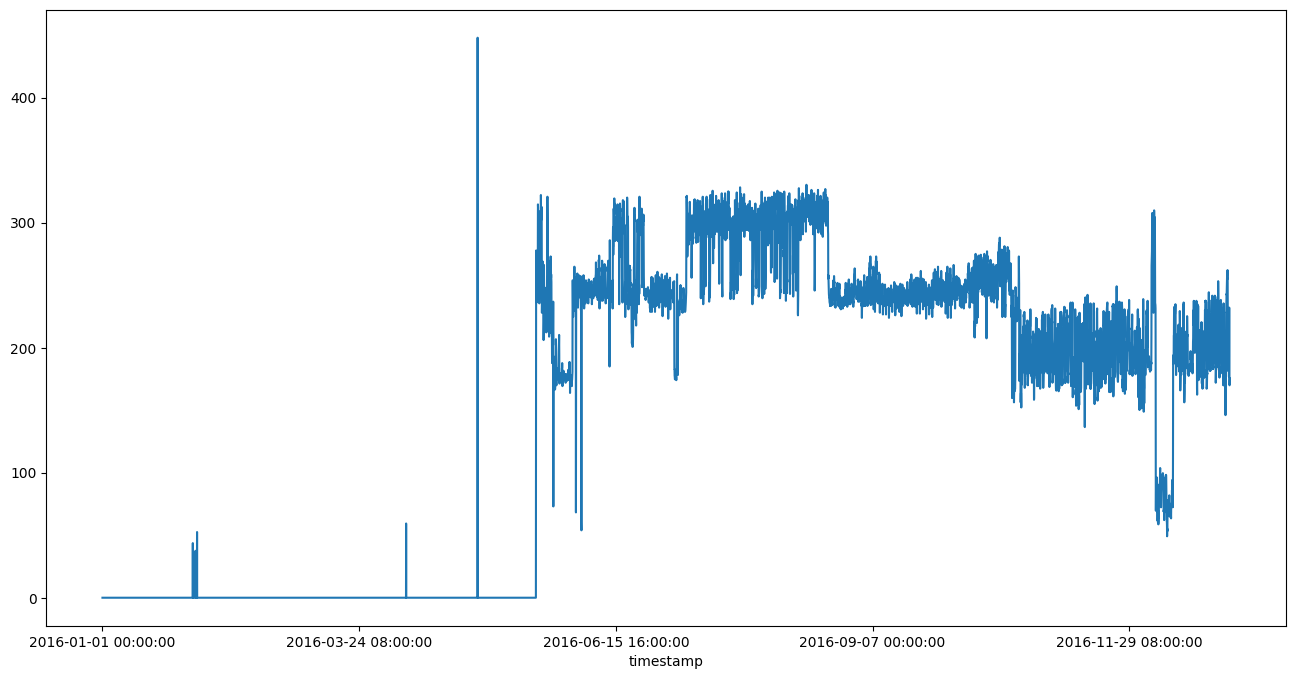

In [ ]:
# Loading data

buildings = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/building_metadata.csv.gz")
# print(buildings.head())
weather = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/weather_train.csv.gz")
# print(weather.head())
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")
print(energy_0.head())
energy_0.set_index("timestamp")["meter_reading"].plot()
plt.show()

In [ ]:
# Merging energy consumption and building information

energy_0 = pd.merge(left=energy_0, right=buildings, how="left",
                    left_on="building_id", right_on="building_id")
print(energy_0.head())

   building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            0      0  2016-01-01 01:00:00            0.0        0   
2            0      0  2016-01-01 02:00:00            0.0        0   
3            0      0  2016-01-01 03:00:00            0.0        0   
4            0      0  2016-01-01 04:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  
0   Education         7432      2008.0          NaN  
1   Education         7432      2008.0          NaN  
2   Education         7432      2008.0          NaN  
3   Education         7432      2008.0          NaN  
4   Education         7432      2008.0          NaN  


In [ ]:
# Merging energy consumption, building and weather information

energy_0.set_index(["timestamp", "site_id"], inplace=True)
weather.set_index(["timestamp", "site_id"], inplace=True)

energy_0 = pd.merge(left=energy_0, right=weather, how="left",
                    left_index=True, right_index=True)
energy_0.reset_index(inplace=True)
print(energy_0.head())

             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   
1  2016-01-01 01:00:00        0            0      0            0.0   
2  2016-01-01 02:00:00        0            0      0            0.0   
3  2016-01-01 03:00:00        0            0      0            0.0   
4  2016-01-01 04:00:00        0            0      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         7432      2008.0          NaN             24.4   
2   Education         7432      2008.0          NaN             22.8   
3   Education         7432      2008.0          NaN             21.1   
4   Education         7432      2008.0          NaN             20.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              10

In [ ]:
# Finding missing data

for column in energy_0.columns:
    energy_nulls = energy_0[column].isnull().sum()
    if energy_nulls > 0:
        print(column + ": " + str(energy_nulls))
print(energy_0[energy_0["precip_depth_1_hr"].isnull()])

floor_count: 8784
air_temperature: 3
cloud_coverage: 3830
dew_temperature: 3
precip_depth_1_hr: 1
sea_level_pressure: 85
wind_direction: 250
             timestamp  site_id  building_id  meter  meter_reading  \
0  2016-01-01 00:00:00        0            0      0            0.0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.7   

   wind_direction  wind_speed  
0             0.0         0.0  


In [ ]:
# Filling in missing data

energy_0.fillna({"air_temperature": 0}, inplace=True)
energy_0.fillna({"cloud_coverage": 0}, inplace=True)
energy_0.fillna({"dew_temperature": 0}, inplace=True)
energy_0["precip_depth_1_hr"] = energy_0["precip_depth_1_hr"].apply(lambda x: x if x>0 else 0)
energy_0_sea_level_pressure_mean = energy_0["sea_level_pressure"].mean()
energy_0["sea_level_pressure"] = energy_0["sea_level_pressure"].apply(lambda x: energy_0_sea_level_pressure_mean if x!=x else x)
energy_0_wind_direction_mean = energy_0["wind_direction"].mean()
energy_0["wind_direction"] = energy_0["wind_direction"].apply(lambda x: energy_0_wind_direction_mean if x!=x else x)
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           8784 non-null   object 
 1   site_id             8784 non-null   int64  
 2   building_id         8784 non-null   int64  
 3   meter               8784 non-null   int64  
 4   meter_reading       8784 non-null   float64
 5   primary_use         8784 non-null   object 
 6   square_feet         8784 non-null   int64  
 7   year_built          8784 non-null   float64
 8   floor_count         0 non-null      float64
 9   air_temperature     8784 non-null   float64
 10  cloud_coverage      8784 non-null   float64
 11  dew_temperature     8784 non-null   float64
 12  precip_depth_1_hr   8784 non-null   float64
 13  sea_level_pressure  8784 non-null   float64
 14  wind_direction      8784 non-null   float64
 15  wind_speed          8784 non-null   float64
dtypes: flo